## Experiments by Reducing the Number of Parameters



In [0]:
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')/255
xtest = xtest.reshape(xtest.shape[0],28,28,1).astype('float32')/255

In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [0]:
import keras
from keras import models
from keras import layers

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(3, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(6, (5,5), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 3)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 3)         12        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 6)           456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 6)           0         
_________________________________________________________________
dropout_1 (Dropout)  

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [0]:
from sklearn.model_selection import train_test_split 

In [0]:
def step_decay(epoch):
	initial_lrate = 0.01
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
import math
mc = ModelCheckpoint('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Original_LeNet.h5', monitor='val_loss', save_best_only=True)
#tb = TensorBoard(log_dir='/content/cnn/My Drive/CNN_Tutorial/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
#cv = CSVLogger('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Original_LeNet.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)

In [0]:
import os
from google.colab import drive
drive.mount('/content/cnn')
os.chdir('/content/cnn/My Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/cnn


In [0]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, epochs=10, verbose=2,callbacks=[rp,lrate,mc])

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.2961 - acc: 0.9078 - val_loss: 0.1301 - val_acc: 0.9582
Epoch 2/10
 - 3s - loss: 0.1472 - acc: 0.9546 - val_loss: 0.0685 - val_acc: 0.9775
Epoch 3/10
 - 3s - loss: 0.1261 - acc: 0.9617 - val_loss: 0.0610 - val_acc: 0.9825
Epoch 4/10
 - 3s - loss: 0.1107 - acc: 0.9669 - val_loss: 0.0539 - val_acc: 0.9837
Epoch 5/10
 - 3s - loss: 0.1079 - acc: 0.9671 - val_loss: 0.0558 - val_acc: 0.9826
Epoch 6/10
 - 3s - loss: 0.0989 - acc: 0.9698 - val_loss: 0.0629 - val_acc: 0.9819
Epoch 7/10
 - 3s - loss: 0.0954 - acc: 0.9710 - val_loss: 0.0518 - val_acc: 0.9840
Epoch 8/10
 - 3s - loss: 0.0913 - acc: 0.9728 - val_loss: 0.0561 - val_acc: 0.9830
Epoch 9/10
 - 3s - loss: 0.0868 - acc: 0.9727 - val_loss: 0.0484 - val_acc: 0.9849
Epoch 10/10
 - 3s - loss: 0.0743 - acc: 0.9773 - val_loss: 0.0425 - val_acc: 0.9875


In [0]:
score = model.evaluate(xtest,ytest,verbose=1)
print(score[0])
print(score[1]*100)

10000/10000 [==============================] - 1s 86us/step
0.03146227798003238
99.0


**Loss and Acc Curves**

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(10)

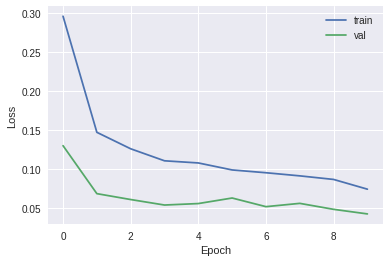

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

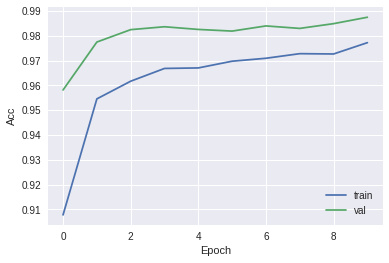

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

**Prediction**

In [0]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[1.9852635e-09 1.3168889e-07 2.1169440e-06 9.1453290e-07 4.4800679e-09
  3.0347382e-09 5.0732543e-12 9.9999380e-01 2.6572209e-08 2.9593871e-06]]
7


1 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
4 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
5 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
6 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
7 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 1
8 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 1
9 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 7
11 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
12 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
13 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
14 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
15 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
16 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
17 Actual is  [0. 0. 0. 0. 0. 0. 

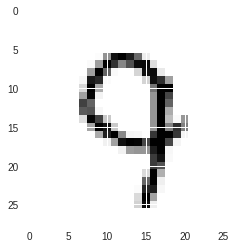

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(1000):
    plt.imshow(xtest[i].reshape(28, 28),cmap='Greys')
    pred = model.predict(xtest[i].reshape(1, 28, 28, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

**Confusion Matrix**

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.99      0.99       980
     class 1       1.00      0.99      0.99      1135
     class 2       0.99      1.00      0.99      1032
     class 3       0.99      0.99      0.99      1010
     class 4       0.99      0.99      0.99       982
     class 5       0.99      0.99      0.99       892
     class 6       0.99      0.98      0.99       958
     class 7       0.98      0.99      0.99      1028
     class 8       0.99      0.99      0.99       974
     class 9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 972    0    1    0    0    1    4    1    1    0]
 [   0 1128    1    3    0    0    1    1    1    0]
 [   1    0 1028    0    1    0    0    2    0    0]
 [   0    0    1  999    0    3    0    2    4    1]
 [   0    0    0    0  977    0    2    0    0    3]
 [   0    0    0    8    0  882    1    0    1    0]
 [   9    3    0    0    1    0  943    0    2    0]
 [   2    2    4    0    1    0    0 1018    0    1]
 [   1    0    1    0    0    0    1    2  969    0]
 [   2    0    1    2    6    1    0    8    5  984]]


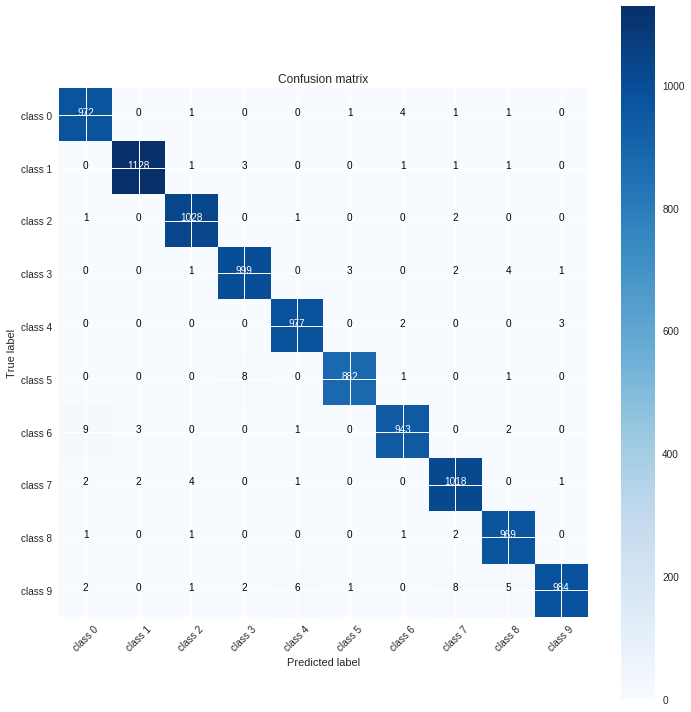

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()